- **Author:** Aisling Towey
- **Date:** 8th November 2021

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read in Data</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Get-Ngram-Counts-in-All-Data" data-toc-modified-id="Get-Ngram-Counts-in-All-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Get Ngram Counts in All Data</a></span></li><li><span><a href="#Plots---Bar-Chart,-Word-Cloud" data-toc-modified-id="Plots---Bar-Chart,-Word-Cloud-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plots - Bar Chart, Word Cloud</a></span></li><li><span><a href="#Compare-Ngram-Counts-in-Real-and-Fake-Articles" data-toc-modified-id="Compare-Ngram-Counts-in-Real-and-Fake-Articles-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare Ngram Counts in Real and Fake Articles</a></span></li><li><span><a href="#Other-Possible-Methods-of-Counting-Ngrams" data-toc-modified-id="Other-Possible-Methods-of-Counting-Ngrams-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Other Possible Methods of Counting Ngrams</a></span></li></ul></div>

# Overview

The dataset consists of a set of articles based on the Syrian war where samples labelled 0 are considered fake and samples labelled 1 are considered credible. The dataset is collected by researchers at American University of Beirut(AUB) and can be found here: https://www.kaggle.com/mohamadalhasan/fake-news-around-syrian-war/data

This dataset is most commonly used for fake news detection typically using text classification models. We are going to use the text in the data to identify common ngrams that occur in the these articles. We will also briefly looks at which ngrams occur more frequently in real and fake articles.

# Import Modules

In [1]:
# !pip install pandas
# !pip install nltk
# !pip install tqdm
# !pip install matplotlib
# !pip install sklearn
# !pip install wordcloud
# !pip install seaborn

In [2]:
import os
import pandas as pd
# from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import numpy as np
import re
import collections
import nltk
nltk.download('punkt')
from collections import Counter
from nltk.util import ngrams 
import string
from tqdm import tqdm
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
stopwords = stopwords.words('english')
stopwords.extend(['thank', 'thanks', 'please', 'great', '2021', 'would', 'us', 'thats', 'hi', 'ok', 'june', 'july', 'august', 'may', 'get', 'wont', 'im', 'good', 'dont', 'make', 'got', 'made', 'yes', 'oh', 'ah', 'pls', 'thankyou', 'u', 
                  'jan', 'january', 'feb', 'february', 'mar', 'march', 'apr', 'april', 'may', 'jun', 'july', 'aug', 'september', 'sept', 'oct', 'october', 'nov', 'november', 'dec', 'december', 'monday', 'tuesday', 'wednesday', 'thursday',
                  'friday', 'saturday', 'sunday', 'mon', 'tues', 'wed', 'thurs', 'fri', 'sat', 'sun', 'much', 'hello', 'didnt', 'sorry', 'fine', 'also', 'let', 'going', 'see', 'need', 'like', 'want', 'say', "see", 'know',
                 "using", 'let', 'also', 'able', 'used', 'going', 'sure', 'think', "said", 'give', 'okay', 'come', 'put', 'told', 'done', 'given', 'seem', 'ive', 'went', 'asking', 'asked', 'ask', 'else', 'bit', 'paul', 'day', 'p',
                  'go', 'say', 'use', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'saying', 'bye', 'could']), 

from wordcloud import WordCloud
import seaborn as sns
import matplotlib.ticker as mtick

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aislingtowey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aislingtowey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aislingtowey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read in Data

In [3]:
data = pd.read_csv('syrian_new_dataset.csv', encoding='ISO-8859-1')
data = data[['article_title', 'article_content', 'labels']]
number_of_articles = len(data)
print(f'Len data: {number_of_articles}')
print(data.info())
print(data['labels'].value_counts())
data_real = data.loc[data['labels']==1] #1 is real
data_fake = data.loc[data['labels']==0] #0 is fake
number_of_real_articles = len(data_real)
number_of_fake_articles = len(data_fake)
data.head(3)

Len data: 804
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_title    804 non-null    object
 1   article_content  804 non-null    object
 2   labels           804 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.0+ KB
None
1    426
0    378
Name: labels, dtype: int64


,article_title,article_content,labels
0,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,0
1,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,0
2,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,0


# Helper Functions

In [4]:
def count_and_collate_ngrams(data:pd.core.frame.DataFrame, text_column:str, ngram_options:list):
    
    """
    This function iterates through the text in a dataframe, gets the ngrams in each piece of text and calculates the count of ngrams in all of the text
    
    :param data: pandas dataframe with column containing the text to analyse
    :param text column: the string name of the text column
    :param ngram_options: a list containing integers. Each integer is iterated over to get that number of
    sequence of words. eg 2 would search for bigrams and 3 would search for trigrams
    """
    
    # create a counter object where we will store the counts of each ngram
    counts = collections.Counter()

    # create a list for storing the text and ngrams in the text that we can later convert to a pandas df
    ngrams_list = []

    for index, row in tqdm(data.iterrows(), total=data.shape[0]):
        df_row = {'article': row[text_column]}
        ngrams_all = get_ngrams_from_text(row['article_content'], ngram_options)
        for ngrams in ngrams_all:
            for key, value in ngrams.items():
                df_row[str(key)+"grams"] = value
                counts.update(value)
        ngrams_list.append(df_row)
    ngram_df = pd.DataFrame(ngrams_list)
    
    counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
    counts_df.columns = ['ngram', 'count']
    counts_df = counts_df.sort_values(by='count', ascending=False)
    
    # add string column if desider so it is easier to search
    # ngram_df['unigrams_string'] = ngram_df['1grams'].apply(lambda row: " ".join([' '.join(i) for i in row])).astype('str') 
    
    return ngram_df, counts_df

In [5]:
def get_ngrams_from_text(text:str, n_options:list[int]) -> list:
    """
    This function takes a piece of text and returns the ngrams in the text
    
    :param text: text to search for ngrams
    :param n_options: a list containing integers. Each integer is iterated over to get that number of
    sequence of words. eg 2 would search for bigrams and 3 would search for trigrams
    """
    
    # first tokenize and lower the text
    words = nltk.word_tokenize(text)
    words = [x.lower() for x in words]
    
    ngrams_list = []
    for n in n_options:
        # now count ngrams in the text
        ngram_list_all = list(nltk.ngrams(words, n))
        # if a piece of text contains the same unigram/bigram multiple time, we only want to include it once
        ngrams = list(set([ngram for ngram in ngram_list_all])) 
        ngrams_list.append({n:ngrams})

    return ngrams_list

In [6]:
def clean_ngram_text(ngram_column:str):
    """
    This function removes punctuation, stopwords, digits and replaces broken apostrophes
    We complete this after we create the counts of ngrams to avoid inaccurate combinations of ngrams
    eg. "me and you", if we removed the stopword "and" before getting our ngrams we would end up with an
    ngram "me you" which doesn't make sense
    
    :param ngram_column: the name of the column containing the ngrams (string)
    """
    
    # replace dodgy apostrophes
    ngrams = ' '.join(ngram_column).replace("|’","'")
    
    # if the ngram contains punctuations, stopwords or digits we will return None and remove these None rows after
    # want to get rid of dates like 12th or 1st, but not get rid of £10 voucher
    if any(punc in ngrams for punc in string.punctuation) or any(stopword in ngrams.split() for stopword in stopwords) or any(x.isdigit() for x in ngrams.split()) or any(re.findall(r"(?<=\d)(st|nd|rd|th)\b", x) for x in 
                 ngrams.split())  :
            return ''
     
    return ngrams

# Get Ngram Counts in All Data

We have an option to lemmatize the text before we get our ngrams however this often causes issues. We would need to lemmatize the text before creating the ngrams to avoid words being counted twice that are the same word lemmatized. However, if we lemmatize before removing stop words, words such as "was" will change to "wa". "Was" needs to be specified as a verb to avoid this but we don't really want to have to do this for every stopword. If we calculate the ngrams after we remove stopwords we will get inaccurate combinations of ngrams eg. "me and you", if we removed the stopword "and" before getting our ngrams we would end up with an ngram "me you" which doesn't make sense. Therefore we are going to leave out lemmatization in this example.

In [7]:
# lemmatize if needed
# data['article_content'] = data['article_content'].apply(lambda row: ' '.join([lmtzr.lemmatize(word) for word in row.split()]))

# get ngrams from text
ngram_df, counts_df = count_and_collate_ngrams(data, 'article_content', [1,2])
# clean_ngrams
clean_ngrams = counts_df.apply(lambda row: clean_ngram_text(row['ngram']), axis=1)
clean_ngrams = pd.concat([counts_df, clean_ngrams], axis=1)
clean_ngrams.columns = ['ngram_tuple', 'count', 'ngram']
clean_ngrams = clean_ngrams.loc[clean_ngrams['ngram']!='']

# get ngram percentage occurrance in articles
clean_ngrams['percentage_of_articles'] = round((clean_ngrams['count']/number_of_articles)*100, 2) # get phrase percentage in all articles
clean_ngrams = clean_ngrams.loc[clean_ngrams['count']>10] # only show phrases that appear more than 10 times in a month
clean_ngrams=clean_ngrams[['ngram', 'count', 'percentage_of_articles']]
clean_ngrams[0:5]

100%|████████████████████████████████████████| 804/804 [00:02<00:00, 288.63it/s]


,ngram,count,percentage_of_articles
1053,killed,727,90.42
123,syrian,681,84.70
73,syria,564,70.15
1045,people,504,62.69
655,city,469,58.33


# Plots - Bar Chart, Word Cloud

Let's plot the top occuring ngrams in a column chart and wordcloud.

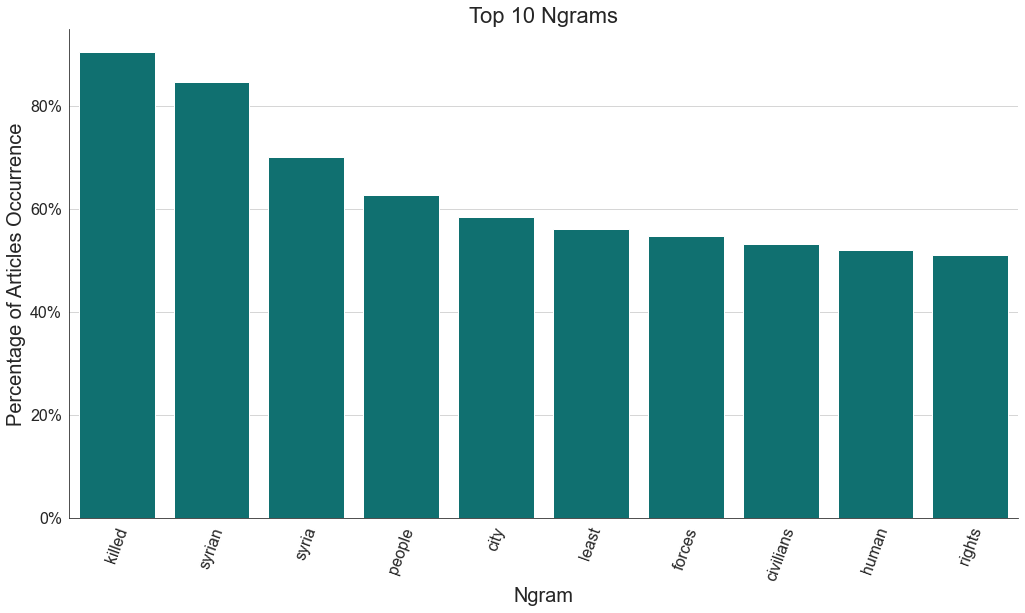

In [8]:
sns.set_style("white")
plt.figure(figsize=(17,9))

top_ngrams = clean_ngrams[0:10]

ax=sns.barplot(x='ngram', y='percentage_of_articles',data=top_ngrams, dodge = False, color='teal') 
for item in ax.get_xticklabels():
    item.set_rotation(70)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.yaxis.grid(True)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Ngram', fontsize=20)
ax.set_ylabel('Percentage of Articles Occurrence', fontsize=20)
plt.title('Top 10 Ngrams', fontsize=22)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# plt.savefig('top_ngrams.png', transparent=True)

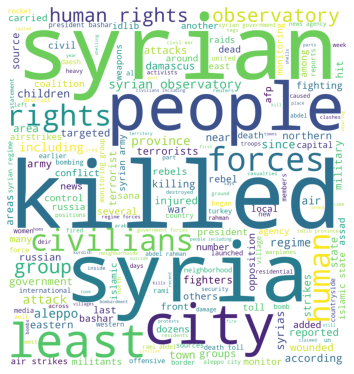

In [9]:
ngram_frequency_dict = dict(zip(clean_ngrams['ngram'],clean_ngrams['count'].tolist()))

text = [[clean_ngrams['ngram']]]
wordcloud = WordCloud(width = 1700, height = 1800,
                background_color ='white',
                min_font_size = 10)

wordcloud.generate_from_frequencies(ngram_frequency_dict)

# plot the WordCloud image                       
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Compare Ngram Counts in Real and Fake Articles

In [10]:
# Real articles
ngram_df, counts_df_real = count_and_collate_ngrams(data_real, 'article_content', [1,2])
clean_ngrams_real = counts_df_real.apply(lambda row: clean_ngram_text(row['ngram']), axis=1)
clean_ngrams_real = pd.concat([counts_df_real, clean_ngrams_real], axis=1)
clean_ngrams_real.columns = ['ngram_tuple', 'count', 'ngram']
clean_ngrams_real = clean_ngrams_real.loc[clean_ngrams_real['ngram']!='']
clean_ngrams_real['percentage_of_articles'] = round((clean_ngrams_real['count']/number_of_real_articles)*100, 2) # get phrase percentage in all articles
clean_ngrams_real = clean_ngrams_real.loc[clean_ngrams_real['count']>10] # only show phrases that appear more than 10 times in a month
clean_ngrams_real=clean_ngrams_real[['ngram', 'count', 'percentage_of_articles']]

# Fake articles
ngram_df, counts_df_fake = count_and_collate_ngrams(data_fake, 'article_content', [1,2])
clean_ngrams_fake = counts_df_fake.apply(lambda row: clean_ngram_text(row['ngram']), axis=1)
clean_ngrams_fake = pd.concat([counts_df_fake, clean_ngrams_fake], axis=1)
clean_ngrams_fake.columns = ['ngram_tuple', 'count', 'ngram']
clean_ngrams_fake = clean_ngrams_fake.loc[clean_ngrams_fake['ngram']!='']
clean_ngrams_fake['percentage_of_articles'] = round((clean_ngrams_fake['count']/number_of_fake_articles)*100, 2) # get phrase percentage in all articles
clean_ngrams_fake = clean_ngrams_fake.loc[clean_ngrams_fake['count']>10] # only show phrases that appear more than 10 times in a month
clean_ngrams_fake=clean_ngrams_fake[['ngram', 'count', 'percentage_of_articles']]

100%|████████████████████████████████████████| 378/378 [00:01<00:00, 368.25it/s]


We will make a table showing the ngrams where the percentage of articles appeared in varies most between real and fake articles.

In [11]:
# now let's get the ngram article occurance percentage difference between real and fake articles
real_and_fake_ngrams = pd.merge(clean_ngrams_real, clean_ngrams_fake, on='ngram', suffixes=('_real', '_fake'))
real_and_fake_ngrams['percentage_difference'] = real_and_fake_ngrams['percentage_of_articles_real'] - real_and_fake_ngrams['percentage_of_articles_fake']
comparison_df = real_and_fake_ngrams[['ngram', 'percentage_of_articles_real', 'percentage_of_articles_fake', 'percentage_difference']].sort_values(by='percentage_difference', ascending=False).reset_index(drop=True)
comparison_df.head(10)

,ngram,percentage_of_articles_real,percentage_of_articles_fake,percentage_difference
0,forces,58.22,50.79,7.43
1,people including,15.49,8.20,7.29
2,al,18.31,11.90,6.41
3,updated,10.33,3.97,6.36
4,northern syria,13.15,6.88,6.27
5,reports,18.54,12.43,6.11
6,areas,34.74,28.84,5.90
7,daesh,18.31,12.43,5.88
8,sdf,8.69,2.91,5.78
9,border,18.54,12.96,5.58


From the above table we can see that the word "forces" appears 7.43% more in real articles than fake articles. It is hard to know whether this is a coincidence or there is meaning to it.

# Other Possible Methods of Counting Ngrams

There are multiple other ways ngrams can be counted in text. All methods should achieve the same results. NLTK's FreqDist() method is one way.

In [12]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

sentence = 'hello there, I am really really busy right now.'
sentence  = nltk.word_tokenize(sentence)

word_frequency_distrib = nltk.FreqDist(sentence)
ngram_frequency_distrib = nltk.FreqDist(nltk.ngrams(sentence, 1))

ngram_frequency_distrib.most_common(3)

[(('really',), 2), (('hello',), 1), (('there',), 1)]

CountVectorizer is another option to count ngrams in text.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer(ngram_range=(1,2), analyzer='word')
# would need to look at getting the counts for each article so we can avoid double counting 
# ngrams that appear more than once in an article
sparse_matrix = word_vectorizer.fit_transform(data['article_content'])
frequencies = sum(sparse_matrix).toarray()[0]
df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df.sort_values(by='frequency', ascending=False)[0:5]

/Users/aislingtowey/.pyenv/versions/3.9.6/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,frequency
the,17395
in,8606
of,8094
and,6308
to,4260
